# Cleaning Data Excercise
### A cosmetic dataframe

In [14]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None

Metadata

In [2]:
# Importing Data

filepath="Cosmeticos python.xlsx"
df=pd.read_excel(filepath)

### 1. Exploring Data

In [3]:
df.head()

,Códigos de producto,Precio,Cliente,Código de cliente,Pedidos,Total
0,51993Masc,9.98,Candy's Beauty Supply,PINNC980,191,1906.18
1,49631Foun,14.49,Rockland's,ARLVA283,152,2202.48
2,42292Glos,6.74,Rudiger Pharmacy,CHEMD763,758,5108.92
3,86661Shad,5.71,Elizabethtown Supply,COLSC761,"""308""",1758.68
4,49541Eyel,7.94,Rockland's,ARLVA425,50,397.00


In [4]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'30 Rows by 6 Columns'

In [5]:
df.describe()

,Precio,Total
count,30.000000,29.000000
mean,11.020333,4780.060000
std,3.628278,3798.349567
min,4.330000,397.000000
25%,8.070000,1758.680000
50%,11.475000,3455.640000
75%,13.120000,6132.280000
max,20.040000,15671.280000


### 2. Cleaning up the Data!

In [6]:
df

,Códigos de producto,Precio,Cliente,Código de cliente,Pedidos,Total
0,51993Masc,9.98,Candy's Beauty Supply,PINNC980,191,1906.18
1,49631Foun,14.49,Rockland's,ARLVA283,152,2202.48
2,42292Glos,6.74,Rudiger Pharmacy,CHEMD763,758,5108.92
3,86661Shad,5.71,Elizabethtown Supply,COLSC761,"""308""",1758.68
4,49541Eyel,7.94,Rockland's,ARLVA425,50,397.00
5,58337Foun,13.57,Candy's Beauty Supply,PINNC939,673,9132.61
6,40014Masc,8.46,Elizabethtown Supply,COLSC649,94,795.24
7,86139Lips,5.55,Candy's Beauty Supply,PINNC496,299,1659.45
8,69601Exfo,11.05,Rockland's,ARLVA851,850,9392.50
9,25331Glos,7.58,Rockland's,ARLVA924,169,1281.02


In [118]:
# Replacing spaces between columns

df.columns=df.columns.str.replace(" ","_")

In [17]:
# Columns to lower

df.rename(columns=str.lower,inplace=True)
df.sample()

,códigos_de_producto,precio,cliente,código_de_cliente,pedidos,total
0,51993Masc,9.98,Candy's Beauty Supply,PINNC980,191,1906.18


In [18]:
# Creating a product column

df["producto"]=df["códigos_de_producto"]
df.sample()

,códigos_de_producto,precio,cliente,código_de_cliente,pedidos,total,producto
22,75112Foun,13.24,Elizabethtown Supply,COLSC133,261,3455.64,75112Foun


In [63]:
df["códigos_de_producto"].str.len().head(3)

0    9
1    9
2    9
Name: códigos_de_producto, dtype: int64

In [65]:
filter=df.códigos_de_producto=="51993Masc"
df["códigos_de_producto"].loc[filter].str.index("M")

0    5
Name: códigos_de_producto, dtype: int64

In [68]:
# Separating name of the product from the number of code

df=df.assign(producto=lambda x:(x["códigos_de_producto"].str[5:]))
df.sample()

,códigos_de_producto,precio,cliente,código_de_cliente,pedidos,total,producto
18,35073Foun,11.82,Elizabethtown Supply,COLSC813,189,2233.98,Foun


In [70]:
# Separting the name of the product from the code

df["códigos_de_producto"]=df["códigos_de_producto"].str[:5]
df.sample()

,códigos_de_producto,precio,cliente,código_de_cliente,pedidos,total,producto
19,17691,11.22,Elizabethtown Supply,COLSC533,621,6967.62,Masc


In [72]:
# Renaiming a column

df.rename(columns=({"códigos_de_producto":"codigo_producto"}),inplace=True)
df.sample()

,codigo_producto,precio,cliente,código_de_cliente,pedidos,total,producto
6,40014,8.46,Elizabethtown Supply,COLSC649,94,795.24,Masc


In [73]:
df

,codigo_producto,precio,cliente,código_de_cliente,pedidos,total,producto
0,51993,9.98,Candy's Beauty Supply,PINNC980,191,1906.18,Masc
1,49631,14.49,Rockland's,ARLVA283,152,2202.48,Foun
2,42292,6.74,Rudiger Pharmacy,CHEMD763,758,5108.92,Glos
3,86661,5.71,Elizabethtown Supply,COLSC761,"""308""",1758.68,Shad
4,49541,7.94,Rockland's,ARLVA425,50,397.00,Eyel
5,58337,13.57,Candy's Beauty Supply,PINNC939,673,9132.61,Foun
6,40014,8.46,Elizabethtown Supply,COLSC649,94,795.24,Masc
7,86139,5.55,Candy's Beauty Supply,PINNC496,299,1659.45,Lips
8,69601,11.05,Rockland's,ARLVA851,850,9392.50,Exfo
9,25331,7.58,Rockland's,ARLVA924,169,1281.02,Glos


In [77]:
# Cleaning the "" from the numbers in "pedidos"column

df["pedidos"]=df["pedidos"].replace({'["\n]':""},regex=True)
df

,codigo_producto,precio,cliente,código_de_cliente,pedidos,total,producto
0,51993,9.98,Candy's Beauty Supply,PINNC980,191,1906.18,Masc
1,49631,14.49,Rockland's,ARLVA283,152,2202.48,Foun
2,42292,6.74,Rudiger Pharmacy,CHEMD763,758,5108.92,Glos
3,86661,5.71,Elizabethtown Supply,COLSC761,308,1758.68,Shad
4,49541,7.94,Rockland's,ARLVA425,50,397.00,Eyel
5,58337,13.57,Candy's Beauty Supply,PINNC939,673,9132.61,Foun
6,40014,8.46,Elizabethtown Supply,COLSC649,94,795.24,Masc
7,86139,5.55,Candy's Beauty Supply,PINNC496,299,1659.45,Lips
8,69601,11.05,Rockland's,ARLVA851,850,9392.50,Exfo
9,25331,7.58,Rockland's,ARLVA924,169,1281.02,Glos


In [82]:
# Casting "pedidos" columns as int(since it is formated as string)

df["pedidos"]=df["pedidos"].astype(int)

In [87]:
# Recalculating the total since there's a NaN value

df=df.assign(total=lambda x:(x["precio"]*x["pedidos"]))
df

,codigo_producto,precio,cliente,código_de_cliente,pedidos,total,producto
0,51993,9.98,Candy's Beauty Supply,PINNC980,191,1906.18,Masc
1,49631,14.49,Rockland's,ARLVA283,152,2202.48,Foun
2,42292,6.74,Rudiger Pharmacy,CHEMD763,758,5108.92,Glos
3,86661,5.71,Elizabethtown Supply,COLSC761,308,1758.68,Shad
4,49541,7.94,Rockland's,ARLVA425,50,397.00,Eyel
5,58337,13.57,Candy's Beauty Supply,PINNC939,673,9132.61,Foun
6,40014,8.46,Elizabethtown Supply,COLSC649,94,795.24,Masc
7,86139,5.55,Candy's Beauty Supply,PINNC496,299,1659.45,Lips
8,69601,11.05,Rockland's,ARLVA851,850,9392.50,Exfo
9,25331,7.58,Rockland's,ARLVA924,169,1281.02,Glos


In [88]:
# Checking for duplicates

df["cliente"].unique()

array(["Candy's Beauty Supply", "Rockland's", 'Rudiger Pharmacy',
       'Elizabethtown Supply', "   Rockland's"], dtype=object)

In [91]:
# Stripping "cliente" column

df["cliente"]=df["cliente"].str.strip()
df["cliente"].unique()

array(["Candy's Beauty Supply", "Rockland's", 'Rudiger Pharmacy',
       'Elizabethtown Supply'], dtype=object)

In [92]:
df.columns

Index(['codigo_producto', 'precio', 'cliente', 'código_de_cliente', 'pedidos',
       'total', 'producto'],
      dtype='object')

In [96]:
# Rerganizing the table

df=df.reindex(columns=(["codigo_producto","producto","cliente","código_de_cliente","pedidos","precio","total"]))
df.sample()

,codigo_producto,producto,cliente,código_de_cliente,pedidos,precio,total
21,26156,Foun,Candy's Beauty Supply,PINNC615,146,12.01,1753.46


In [97]:
# All set! for analysing

df

,codigo_producto,producto,cliente,código_de_cliente,pedidos,precio,total
0,51993,Masc,Candy's Beauty Supply,PINNC980,191,9.98,1906.18
1,49631,Foun,Rockland's,ARLVA283,152,14.49,2202.48
2,42292,Glos,Rudiger Pharmacy,CHEMD763,758,6.74,5108.92
3,86661,Shad,Elizabethtown Supply,COLSC761,308,5.71,1758.68
4,49541,Eyel,Rockland's,ARLVA425,50,7.94,397.00
5,58337,Foun,Candy's Beauty Supply,PINNC939,673,13.57,9132.61
6,40014,Masc,Elizabethtown Supply,COLSC649,94,8.46,795.24
7,86139,Lips,Candy's Beauty Supply,PINNC496,299,5.55,1659.45
8,69601,Exfo,Rockland's,ARLVA851,850,11.05,9392.50
9,25331,Glos,Rockland's,ARLVA924,169,7.58,1281.02


### 3. Analyse Data

In [98]:
# Making copies

sales=df.copy()

#### 1. Sales by costumer

In [99]:
sales

,codigo_producto,producto,cliente,código_de_cliente,pedidos,precio,total
0,51993,Masc,Candy's Beauty Supply,PINNC980,191,9.98,1906.18
1,49631,Foun,Rockland's,ARLVA283,152,14.49,2202.48
2,42292,Glos,Rudiger Pharmacy,CHEMD763,758,6.74,5108.92
3,86661,Shad,Elizabethtown Supply,COLSC761,308,5.71,1758.68
4,49541,Eyel,Rockland's,ARLVA425,50,7.94,397.00
5,58337,Foun,Candy's Beauty Supply,PINNC939,673,13.57,9132.61
6,40014,Masc,Elizabethtown Supply,COLSC649,94,8.46,795.24
7,86139,Lips,Candy's Beauty Supply,PINNC496,299,5.55,1659.45
8,69601,Exfo,Rockland's,ARLVA851,850,11.05,9392.50
9,25331,Glos,Rockland's,ARLVA924,169,7.58,1281.02


In [106]:
costumer_sales=sales.groupby(["cliente"],as_index=False).total.sum().sort_values("total",ascending=True)
costumer_sales


,cliente,total
0,Candy's Beauty Supply,23541.02
2,Rockland's,27989.67
1,Elizabethtown Supply,46644.42
3,Rudiger Pharmacy,48753.88


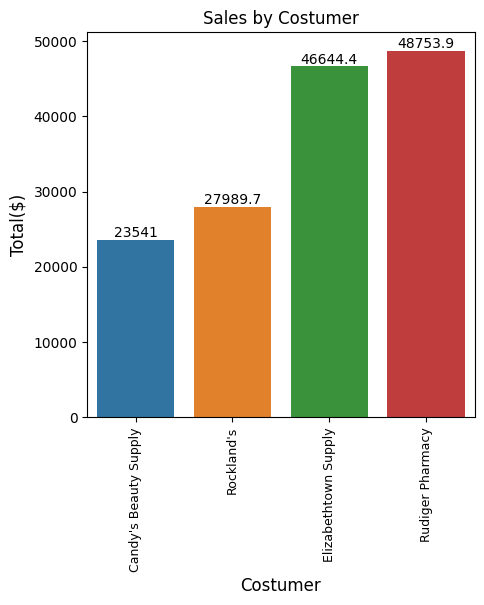

In [107]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x="cliente",y="total",data=costumer_sales,hue="cliente",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales by Costumer")
plt.xlabel("Costumer",fontsize=12)
plt.ylabel("Total($)",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 2. Sales by product.

In [109]:
df.head(10)

,codigo_producto,producto,cliente,código_de_cliente,pedidos,precio,total
0,51993,Masc,Candy's Beauty Supply,PINNC980,191,9.98,1906.18
1,49631,Foun,Rockland's,ARLVA283,152,14.49,2202.48
2,42292,Glos,Rudiger Pharmacy,CHEMD763,758,6.74,5108.92
3,86661,Shad,Elizabethtown Supply,COLSC761,308,5.71,1758.68
4,49541,Eyel,Rockland's,ARLVA425,50,7.94,397.00
5,58337,Foun,Candy's Beauty Supply,PINNC939,673,13.57,9132.61
6,40014,Masc,Elizabethtown Supply,COLSC649,94,8.46,795.24
7,86139,Lips,Candy's Beauty Supply,PINNC496,299,5.55,1659.45
8,69601,Exfo,Rockland's,ARLVA851,850,11.05,9392.50
9,25331,Glos,Rockland's,ARLVA924,169,7.58,1281.02


In [111]:
product_sales=sales.groupby(["producto"],as_index=False).total.sum().sort_values("total",ascending=True)
product_sales


,producto,total
4,Lips,1659.45
6,Shad,2732.93
3,Glos,6389.94
1,Eyel,6581.04
0,Exfo,39301.84
5,Masc,43702.06
2,Foun,46561.73


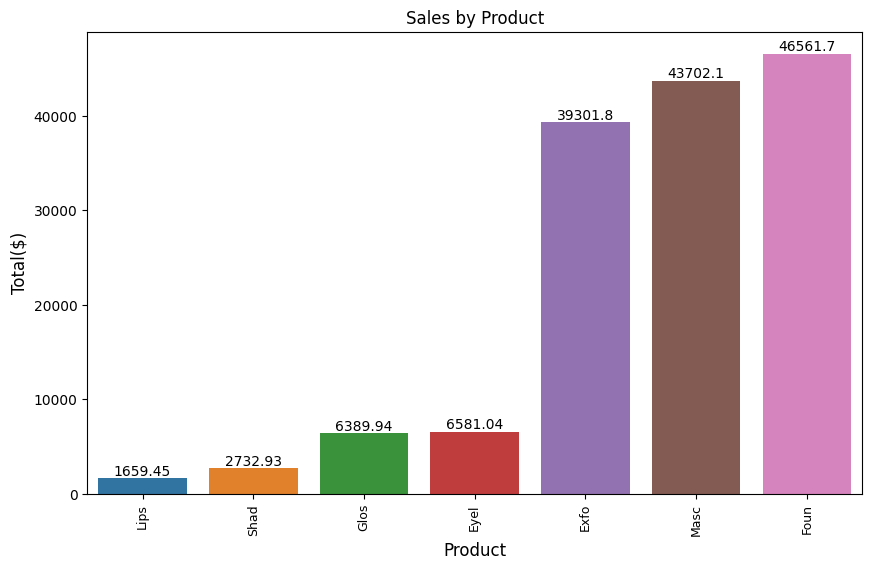

In [117]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="producto",y="total",data=product_sales,hue="producto",palette="tab10",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales by Product")
plt.xlabel("Product",fontsize=12)
plt.ylabel("Total($)",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()